# *🌱🤖 AgriCure AI – Healing Plants with Intelligence 🌿💡*

## INTRODUCTION
Agriculture is the backbone of human survival, providing food security and economic growth across the globe. However, one of the major challenges faced by farmers is the outbreak of plant diseases, which directly affect crop yield and quality. With the rising global population and the need for sustainable farming, early detection and prediction of plant diseases have become increasingly important.

The rapid development of machine learning and data-driven techniques allows researchers and practitioners to analyze environmental factors such as temperature, humidity, rainfall, and soil conditions to forecast potential disease outbreaks. By leveraging these insights, farmers can take preventive measures, reduce crop losses, and ensure healthier agricultural practices.

## PROBLEM STATEMENT 
Plant diseases often spread silently and are detected only after significant damage has occurred. Traditional methods of disease identification require manual inspection, which is time-consuming, labor-intensive, and prone to human error.

This project aims to develop a machine learning-based model that uses environmental and soil parameters to predict the likelihood of plant diseases. By training predictive algorithms on a dataset containing temperature, humidity, rainfall, and soil conditions, the system will help:

* Identify critical factors influencing plant health.

* Predict disease occurrence with accuracy.

* Assist farmers and agricultural experts in making informed decisions for disease prevention and crop protection.

In short, the problem addressed is how to leverage machine learning techniques to build an efficient, automated, and accurate plant disease prediction system that minimizes crop loss and ensures food security.

#### STEP 1: Importing Libraries and exploring datasets

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import joblib
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')


Imported all the essential Python libraries 
and modules that will help us with data analysis, preprocessing, 
model training, and evaluation.

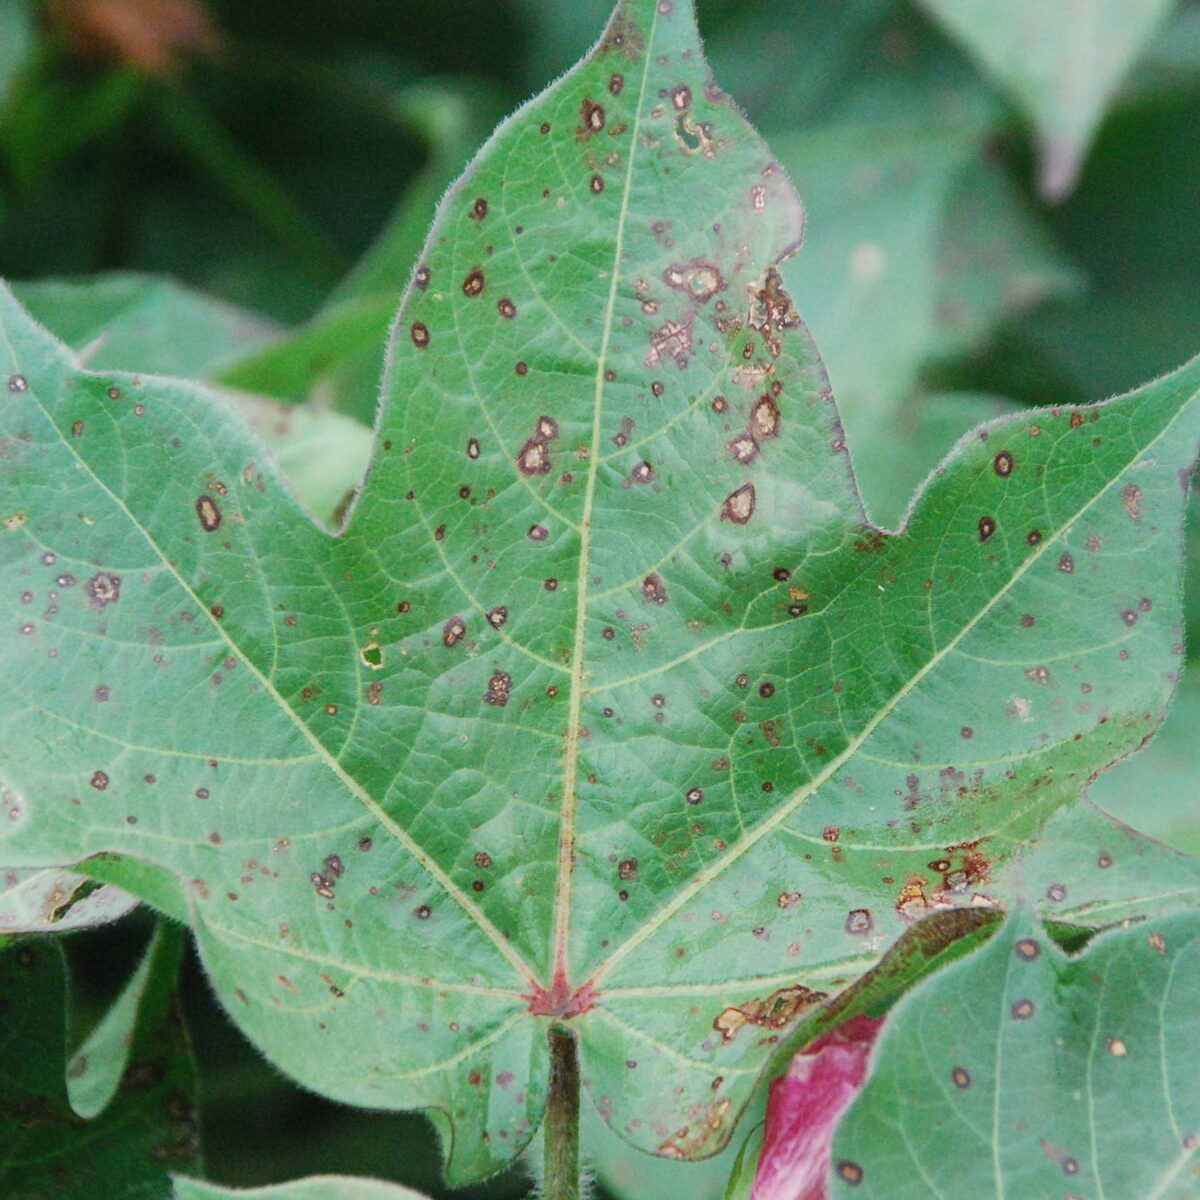

In [2]:
Image("1.jpg")

In [3]:
df = pd.read_csv("plant_disease_dataset.csv")

Loaded the datasets into a pandas DataFrame.

In [4]:
df

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0
...,...,...,...,...,...
9995,31.505510,81.939137,22.406822,5.862952,1
9996,15.008275,86.886833,10.503881,4.070539,0
9997,21.473416,81.891770,13.426869,7.101583,0
9998,27.478828,88.567649,9.719659,7.732620,0


Displays the whole dataset of the DataFrame.

### Dataset Columns Explanation

- **temperature** 🌡️  
  Represents the average temperature of the environment (in °C). Temperature affects crop growth and the spread of plant diseases.

- **humidity** 💧  
  Indicates the moisture content in the air (in %). High humidity levels often create favorable conditions for fungal and bacterial infections in plants.

- **rainfall** 🌧️  
  Refers to the amount of rainfall received (in mm). Adequate rainfall is essential for crop growth, but excess rainfall may lead to waterlogging and disease outbreaks.

- **soil_pH** 🌱  
  Shows the acidity or alkalinity of the soil. Soil pH impacts nutrient availability and plant health, influencing susceptibility to diseases.

- **disease_present** 🦠  
  A target column that indicates whether a plant disease is present (1 = disease detected, 0 = healthy).


In [5]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


Displays the first 5 rows of the DataFrame by default.

In [6]:
df.tail()

,temperature,humidity,rainfall,soil_pH,disease_present
9995,31.505510,81.939137,22.406822,5.862952,1
9996,15.008275,86.886833,10.503881,4.070539,0
9997,21.473416,81.891770,13.426869,7.101583,0
9998,27.478828,88.567649,9.719659,7.732620,0
9999,28.221942,71.900401,4.886391,4.383536,0


Diplays the last 5 rows of the DataFrame by default.

#### STEP 2: Exploratory Data Analysis (EDA)

In [7]:
df.shape

(10000, 5)

Returns a tuple (rows, columns) of the DataFrame.

In [8]:
df.size

50000

Returns the total number of elements in the DataFrame (rows × columns).

In [9]:
df.columns.tolist()

['temperature', 'humidity', 'rainfall', 'soil_pH', 'disease_present']

Returns all column names as a Python list.

In [10]:
df.dtypes

temperature        float64
humidity           float64
rainfall           float64
soil_pH            float64
disease_present      int64
dtype: object

Displays the data type of each column in the DataFrame.

In [11]:
df.isnull().sum()

temperature        0
humidity           0
rainfall           0
soil_pH            0
disease_present    0
dtype: int64

Returns the number of missing (NaN) values in each column of the DataFrame.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


 Provides a concise summary of the DataFrame.

In [13]:
df.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


Generates descriptive statistics for numerical columns in the DataFrame (by default).
* count   → Number of non-null values in each column
* mean    → Average value
* std     → Standard deviation (spread of the data)
* min     → Minimum value
* 25%     → First quartile (Q1) → 25% of data lies below this value
* 50%     → Median (Q2) → Middle value
* 75%     → Third quartile (Q3) → 75% of data lies below this value
* max     → Maximum value

#### STEP 3: Data Visualization 

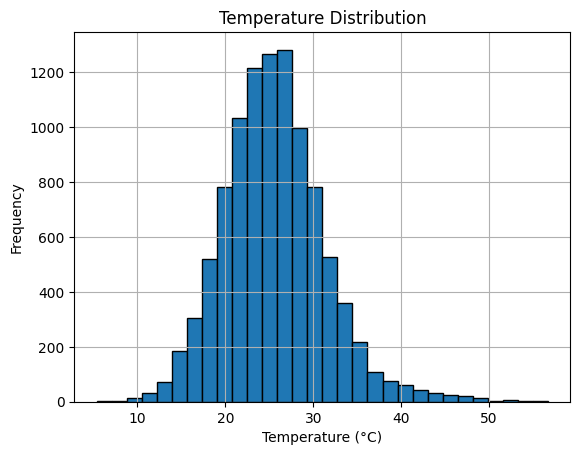

In [14]:
# 1. Histogram of Temperature
figures ={}
fig1 = plt.figure()
df['temperature'].hist(bins=30, edgecolor='black')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
figures['Temperature Distribution'] = fig1

The graph represents the temperature distribution within a plant dataset, showing the frequency of temperature occurrences across a range from 0 to 50°C. The histogram indicates that the majority of temperature values are clustered around 20-30°C, with a peak frequency exceeding 1000 occurrences. This suggests that this temperature range is most common in the dataset, possibly reflecting optimal growing conditions for the plants. Frequencies taper off significantly below 20°C and above 30°C, indicating fewer extreme temperature conditions. The distribution is roughly bell-shaped, hinting at a normal distribution of temperatures. This visualization helps in understanding the environmental conditions the plants are exposed to, which could influence disease prevalence or growth patterns.

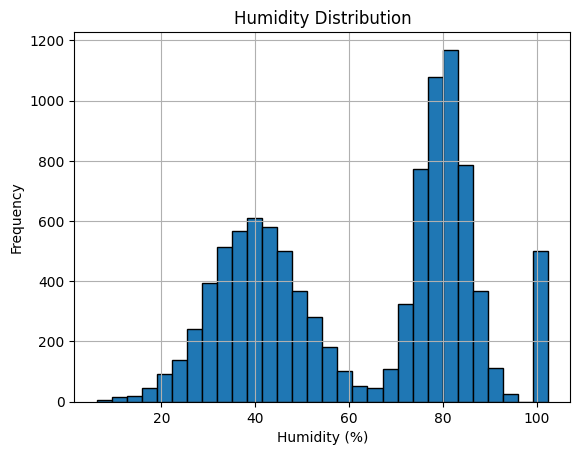

In [15]:
# 2. Histogram of Humidity
fig2 = plt.figure()
df['humidity'].hist(bins=30, edgecolor='black')
plt.title("Humidity Distribution")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
figures['Humidity Distribution'] = fig2

The graph illustrates the humidity distribution within a plant dataset, showing the frequency of humidity levels ranging from 0 to 100%. The histogram peaks around 60-80%, with a frequency exceeding 1000, indicating that this range is most prevalent in the dataset. This suggests that the plants are commonly exposed to moderately high humidity conditions. Frequencies drop significantly below 40% and above 90%, showing fewer occurrences of extreme humidity levels. The distribution appears bimodal, with a secondary peak around 90-100%, which could indicate diverse environmental conditions. This visualization is useful for analyzing how humidity might affect plant health or disease susceptibility in the dataset.

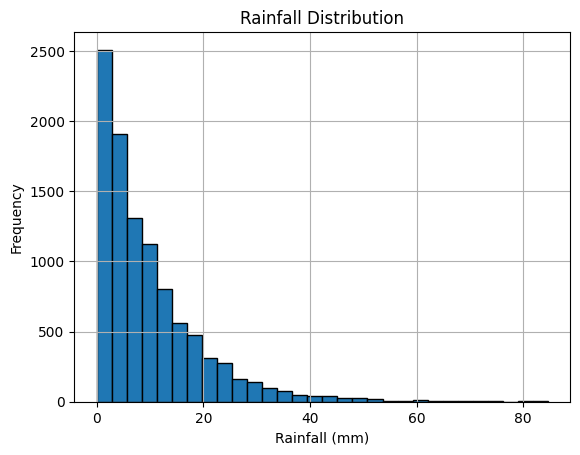

In [16]:
# 3. Histogram of Rainfall
fig3 = plt.figure()
df['rainfall'].hist(bins=30, edgecolor='black')
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
figures['Rainfall Distribution'] = fig3


The graph depicts the rainfall distribution within a plant dataset, with rainfall measured in millimeters (mm) and frequency on the y-axis. The histogram shows a sharp peak around 0-10 mm, with a frequency exceeding 2500, indicating that low rainfall is most common. The frequency drops significantly beyond 20 mm, with very few occurrences above 40 mm. This suggests that the plants in the dataset are predominantly exposed to minimal rainfall conditions. The skewed distribution highlights a preference for arid or semi-arid environments. This visualization can help assess how rainfall levels might influence plant growth or disease patterns in the dataset.

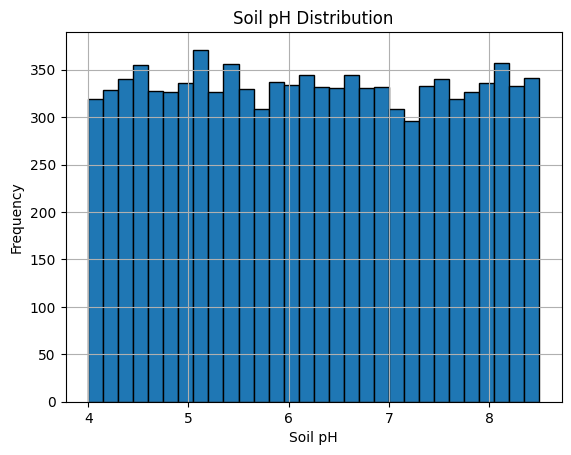

In [17]:
# 4. Histogram of Soil pH
fig4 = plt.figure()
df['soil_pH'].hist(bins=30, edgecolor='black')
plt.title("Soil pH Distribution")
plt.xlabel("Soil pH")
plt.ylabel("Frequency")
figures['Soil pH Distribution'] = fig4

The graph shows the soil pH distribution within a plant dataset, with pH values ranging from 4 to 8 and frequency on the y-axis. The histogram reveals a relatively uniform distribution, with frequencies fluctuating between 200 and 350 across the pH range. This suggests a balanced presence of various soil pH levels in the dataset, with no single pH dominating excessively. The slight dips and peaks indicate minor variations, possibly reflecting diverse soil conditions affecting the plants. This uniformity could imply that the plants are adapted to a wide range of soil pH levels. Such a visualization is useful for understanding soil conditions that might influence plant health or disease susceptibility.

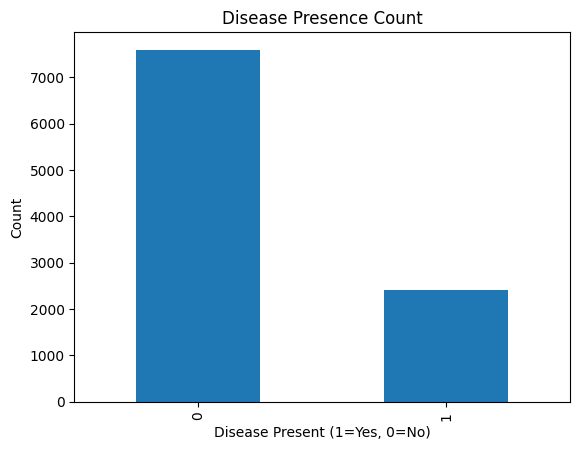

In [18]:
# 5. Disease Presence Countplot
fig5 = plt.figure()
df['disease_present'].value_counts().plot(kind='bar')
plt.title("Disease Presence Count")
plt.xlabel("Disease Present (1=Yes, 0=No)")
plt.ylabel("Count")
figures['Disease Presence Count'] = fig5


The graph is a count plot showing the disease presence count in a plant dataset, with values of 1 (Yes) and 0 (No) indicating disease presence. The bar for 0 (No disease) is significantly higher, exceeding 6000 counts, suggesting that the majority of plants in the dataset are disease-free. In contrast, the bar for 1 (Yes, disease present) is much lower, around 2000 counts, indicating a smaller proportion of diseased plants. This imbalance highlights a skewed distribution, with healthy plants being more common. The visualization provides insight into the prevalence of disease within the dataset, which could be useful for studying disease factors. Further analysis could explore environmental conditions influencing this distribution.

<Figure size 640x480 with 0 Axes>

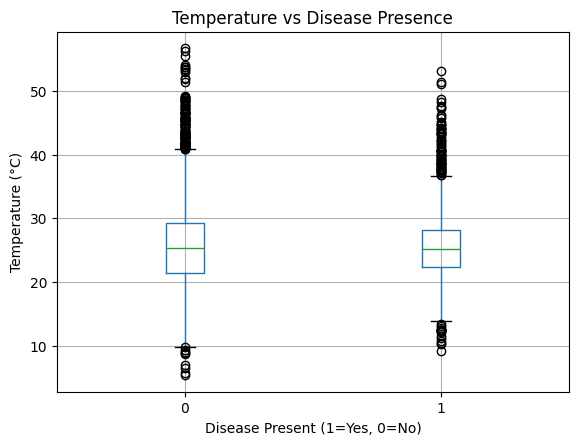

In [19]:

# 6. Temperature vs Disease Presence (Boxplot)
fig6 = plt.figure()
df.boxplot(column='temperature', by='disease_present')
plt.title("Temperature vs Disease Presence")
plt.suptitle("")
plt.xlabel("Disease Present (1=Yes, 0=No)")
plt.ylabel("Temperature (°C)")
figures['Temperature vs Disease Presence'] = fig6

The graph is a boxplot comparing temperature (°C) against disease presence (1=Yes, 0=No) in a plant dataset. For plants with no disease (0), the median temperature is around 25-30°C, with a range spanning from approximately 10°C to 40°C. Plants with disease (1) show a similar median temperature but have a slightly broader interquartile range, suggesting more variability. The whiskers and outliers indicate that temperatures for diseased plants can extend slightly higher, up to around 50°C. This suggests that higher temperatures might be associated with disease occurrence. The overlap in temperature ranges implies that temperature alone may not be a definitive factor for disease presence. This visualization helps in exploring the relationship between temperature and plant disease prevalence.

<Figure size 640x480 with 0 Axes>

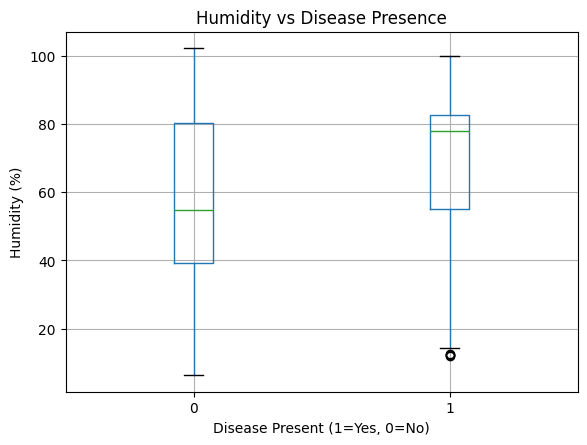

In [20]:
# 7. Humidity vs Disease Presence (Boxplot)
fig7 = plt.figure()
df.boxplot(column='humidity', by='disease_present')
plt.title("Humidity vs Disease Presence")
plt.suptitle("")
plt.xlabel("Disease Present (1=Yes, 0=No)")
plt.ylabel("Humidity (%)")
figures['Humidity vs Disease Presence'] = fig7

The graph is a boxplot comparing humidity (%) against disease presence (1=Yes, 0=No) in a plant dataset. For plants with no disease (0), the median humidity is around 50-60%, with an interquartile range spanning approximately 40-80%. Plants with disease (1) show a slightly higher median humidity, around 60-70%, with a narrower interquartile range of about 50-80%. The whiskers indicate that humidity levels for both groups extend from near 20% to over 90%, with an outlier below 20% for diseased plants. This suggests that higher humidity might be associated with disease presence. The overlap in ranges indicates that humidity alone may not fully determine disease occurrence, warranting further investigation.

<Figure size 640x480 with 0 Axes>

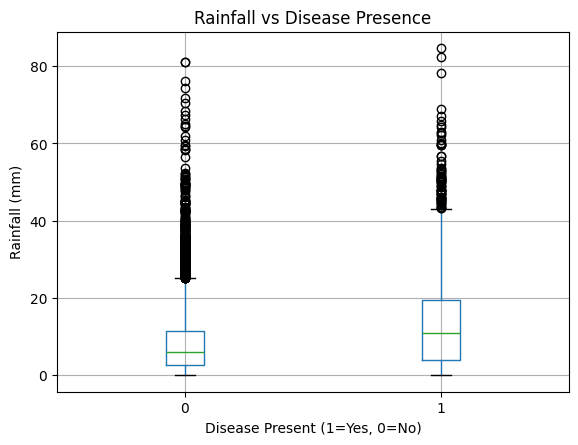

In [21]:
# 8. Rainfall vs Disease Presence (Boxplot)
fig8 = plt.figure()
df.boxplot(column='rainfall', by='disease_present')
plt.title("Rainfall vs Disease Presence")
plt.suptitle("")
plt.xlabel("Disease Present (1=Yes, 0=No)")
plt.ylabel("Rainfall (mm)")
figures['Rainfall vs Disease Presence'] = fig8

The graph is a boxplot comparing rainfall (mm) against disease presence (1=Yes, 0=No) in a plant dataset. For plants with no disease (0), the median rainfall is around 20-30 mm, with an interquartile range spanning approximately 0-40 mm and several outliers extending up to 80 mm. Plants with disease (1) show a similar median rainfall, around 20-30 mm, but with a tighter interquartile range of about 10-40 mm and fewer outliers. The presence of outliers in the no-disease group suggests occasional high rainfall events. This indicates that rainfall levels are relatively consistent across both groups, with slight variations. The overlap suggests that rainfall alone may not be a strong determinant of disease presence, requiring further analysis.

<Figure size 640x480 with 0 Axes>

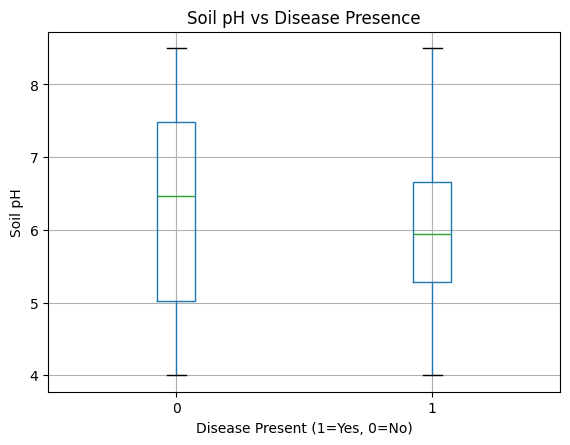

In [22]:
# 9. Soil pH vs Disease Presence (Boxplot)
fig9 = plt.figure()
df.boxplot(column='soil_pH', by='disease_present')
plt.title("Soil pH vs Disease Presence")
plt.suptitle("")
plt.xlabel("Disease Present (1=Yes, 0=No)")
plt.ylabel("Soil pH")
figures['Soil pH vs Disease Presence'] = fig9

The graph is a boxplot comparing soil pH against disease presence (1=Yes, 0=No) in a plant dataset. For plants with no disease (0), the median soil pH is around 6-7, with an interquartile range spanning approximately 5.5 to 7.5. Plants with disease (1) show a similar median pH, also around 6-7, with a slightly narrower interquartile range of about 6 to 7.5. The whiskers for both groups extend from below 5 to just above 8, indicating a wide range of soil pH values. The close overlap in pH ranges suggests that soil pH alone may not strongly influence disease presence. This visualization helps explore the relationship between soil pH and plant disease prevalence.

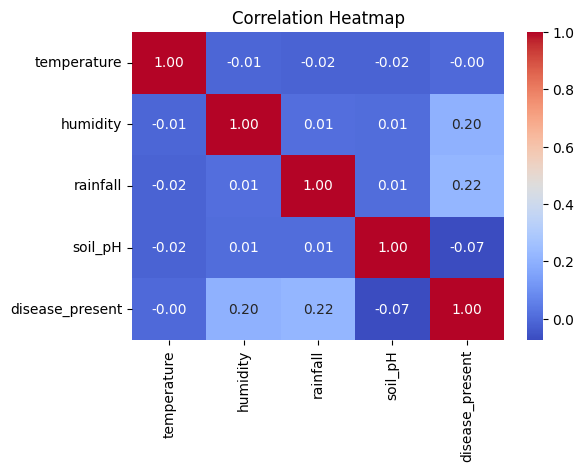

In [23]:
# 10. Correlation Heatmap
fig10 = plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
figures['Correlation Heatmap'] = fig10

The graph is a correlation heatmap for a plant dataset, displaying Pearson correlation coefficients between variables: temperature, humidity, rainfall, soil pH, and disease presence. The color scale ranges from red (positive correlation) to blue (negative), with values close to 1 or -1 indicating strong relationships. Most correlations are very weak (near 0), such as temperature with humidity (-0.01) or rainfall with soil pH (0.01), suggesting minimal linear associations among environmental factors. Notable exceptions include weak positive correlations between humidity and disease presence (0.20) and rainfall and disease presence (0.22), implying higher moisture levels may slightly increase disease likelihood. Soil pH shows a weak negative correlation with disease presence (-0.07), hinting that more acidic soils might be marginally protective. Overall, the heatmap indicates that no single variable strongly predicts others, highlighting the need for multivariate analysis in plant disease studies. This visualization aids in identifying potential risk factors for plant health.

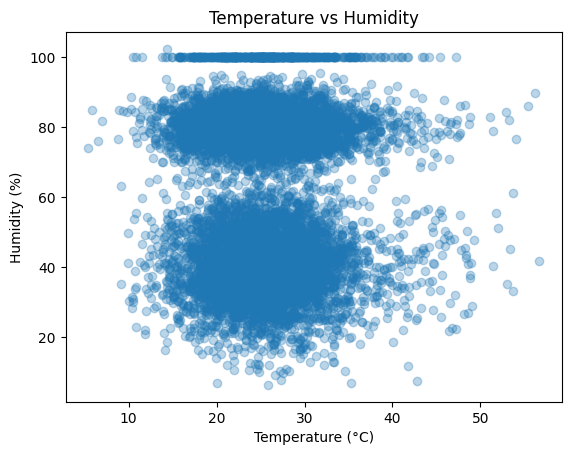

In [24]:
# 11. Temperature vs Humidity (Scatter)
fig11 = plt.figure()
plt.scatter(df['temperature'], df['humidity'], alpha=0.3)
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
figures['Temperature vs Humidity'] = fig11


The graph is a scatter plot showing the relationship between temperature (°C) and humidity (%) in a plant dataset. The data points form a dense cluster, with the highest concentration occurring between 20-40°C and 40-80% humidity, indicating these are the most common conditions. The spread of points suggests a wide range of temperature and humidity combinations, with some extending to 10°C and 100% humidity. There is no clear linear trend, implying that temperature and humidity may not have a strong direct correlation in this dataset. The dense central region could reflect optimal growth conditions for the plants. This visualization helps identify the environmental range plants are exposed to, which may influence disease prevalence or health. Further analysis could explore how these conditions correlate with disease presence.

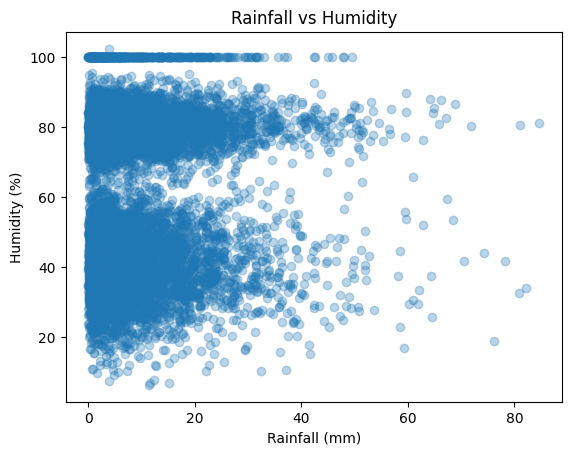

In [25]:
# 12. Rainfall vs Humidity (Scatter)
fig12 = plt.figure()
plt.scatter(df['rainfall'], df['humidity'], alpha=0.3)
plt.title("Rainfall vs Humidity")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Humidity (%)")
figures['Rainfall vs Humidity'] = fig12


The graph is a scatter plot illustrating the relationship between rainfall (mm) and humidity (%) in a plant dataset. The data points are densely clustered between 0-40 mm rainfall and 40-80% humidity, indicating these are the most common conditions. A significant concentration of points is observed around 20-40 mm rainfall and 60-80% humidity, suggesting a frequent combination of moderate rainfall and high humidity. Beyond 40 mm, the data becomes sparser, with fewer instances of high rainfall paired with varying humidity levels. There is no clear linear trend, implying a weak direct correlation between rainfall and humidity. This visualization helps identify the typical environmental conditions plants are exposed to, which may influence growth or disease susceptibility. Further analysis could explore how these factors correlate with disease presence.

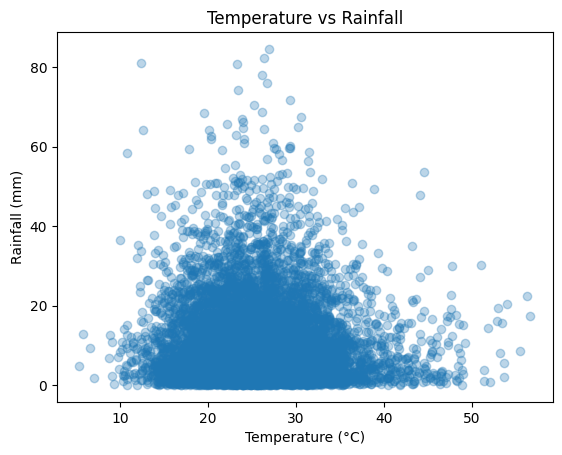

In [26]:
# 13. Temperature vs Rainfall (Scatter)
fig13 = plt.figure()
plt.scatter(df['temperature'], df['rainfall'], alpha=0.3)
plt.title("Temperature vs Rainfall")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
figures['Temperature vs Rainfall'] = fig13

The graph is a scatter plot depicting the relationship between temperature (°C) and rainfall (mm) in a plant dataset. The data points are densely clustered between 20-40°C and 0-40 mm rainfall, indicating these are the most frequent conditions. The highest concentration occurs around 30°C with rainfall up to 20 mm, suggesting a common environmental range for the plants. Beyond 40 mm rainfall, the data thins out, with fewer instances at higher temperatures (40-50°C). There is no clear linear trend, implying a weak direct correlation between temperature and rainfall. This visualization helps identify typical climate conditions plants are exposed to, which may influence growth or disease risk. Further analysis could explore how these factors relate to disease presence.

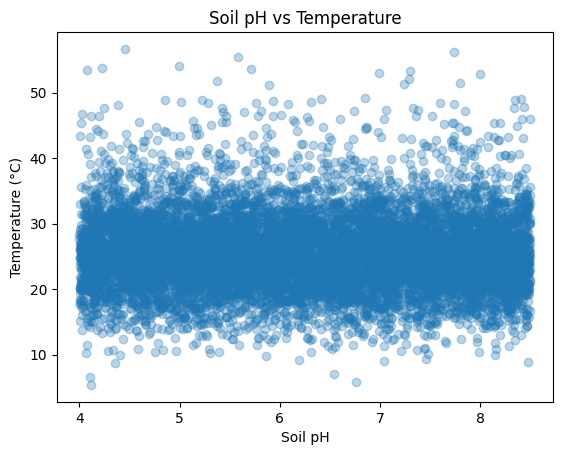

In [27]:
# 14. Soil pH vs Temperature (Scatter)
fig14 = plt.figure()
plt.scatter(df['soil_pH'], df['temperature'], alpha=0.3)
plt.title("Soil pH vs Temperature")
plt.xlabel("Soil pH")
plt.ylabel("Temperature (°C)")
figures['Soil pH vs Temperature'] = fig14

The graph is a scatter plot illustrating the relationship between soil pH and temperature (°C) in a plant dataset. The data points are densely clustered between soil pH 5-7 and temperatures 20-40°C, indicating these are the most common conditions. The highest concentration occurs around pH 6 and 30°C, suggesting a prevalent soil and temperature range for the plants. Beyond pH 7 or below 20°C, the data becomes sparser, with fewer instances at extreme values. There is no clear linear trend, implying a weak direct correlation between soil pH and temperature. This visualization helps identify typical soil and climate conditions plants are exposed to, which may impact growth or disease risk. Further analysis could explore how these factors correlate with disease presence.

#### STEP 4: Data Cleaning

In [28]:
df = df.drop_duplicates()

This removes any duplicate rows from the dataset to ensure data consistency. Duplicate rows can bias analysis or ML models, so we clean them out.

In [29]:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())


All numeric columns have their missing values replaced with the median of that column. Median is more robust than mean, especially when data has outliers.

In [30]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

Categorical columns get missing values replaced with the mode (most frequent value). This prevents introducing bias from rare categories.

In [31]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()

All categorical strings are converted to lowercase and stripped of extra spaces. This ensures consistency (e.g., "Sunny" and "sunny " become the same).

In [32]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]

Any numeric row with a Z-score > 3 (far from the mean) is considered an outlier and removed. This helps prevent extreme values from skewing the model.

In [33]:
df.reset_index(drop=True, inplace=True)

After cleaning, the dataset index is reset for neatness. Old index numbers from dropped rows are discarded.

In [34]:
df

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,28.238443,34.026189,16.095303,6.316734,1
2,32.615149,41.104180,20.311015,6.164949,0
3,23.829233,51.971785,11.851323,8.482468,0
4,23.829315,32.289578,2.058564,5.727685,0
...,...,...,...,...,...
9694,31.505510,81.939137,22.406822,5.862952,1
9695,15.008275,86.886833,10.503881,4.070539,0
9696,21.473416,81.891770,13.426869,7.101583,0
9697,27.478828,88.567649,9.719659,7.732620,0


#### STEP 5: Data Preprocessing 

In [35]:
X = df.drop("disease_present", axis=1) 
y = df["disease_present"]

Here, the dataset is split into features (X) and the target (y). All columns except disease_present are predictors, while disease_present is the variable we want to predict.

In [36]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

Categorical columns (strings/categories) are stored in cat_cols, and numerical columns (integers/floats) go into num_cols. This separation is needed because they’re preprocessed differently.

In [37]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_cat = encoder.fit_transform(X[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(cat_cols))

The categorical columns are One-Hot Encoded into binary (0/1) columns, where each category becomes its own feature. This ensures models can work with non-numeric data.

In [38]:
scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols])
X_num_df = pd.DataFrame(X_num, columns=num_cols)

Numerical columns are standardized (mean = 0, standard deviation = 1). This makes sure all features are on the same scale, which is crucial for many ML models.

In [39]:
X= pd.concat([X_num_df.reset_index(drop=True), 
                         X_cat_df.reset_index(drop=True)], axis=1)

Both processed numerical and categorical dataframes are merged into a single X. Now all features are numeric and scaled, ready for machine learning.

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

The dataset is split into training (80%) and testing (20%) sets. Training data is used to fit the model, while testing data evaluates its performance.

In [41]:
X_train

,temperature,humidity,rainfall,soil_pH
1603,1.149607,-0.493303,-1.030853,-0.067469
8247,0.477905,0.698450,-1.037230,0.502026
6958,-0.228957,0.528848,0.354207,0.495594
4467,1.444120,-0.828973,-0.955189,-0.578685
4511,-1.364743,-0.521451,2.619770,-1.340980
...,...,...,...,...
5734,0.303979,0.663941,1.217286,0.046229
5191,0.496674,0.702363,1.006220,1.643265
5390,0.900306,1.043405,-0.361254,-0.500393
860,0.468989,-1.344415,0.690631,-0.815976


Contains the training input features (independent variables) that the model learns patterns from. It’s usually the largest split (~70–80% of data).

In [42]:
X_test

,temperature,humidity,rainfall,soil_pH
1285,-1.194938,-1.326319,0.212052,1.004376
3047,-0.733393,-0.577853,0.739489,0.269630
1954,0.516756,-0.693632,1.123282,-1.684455
7463,-0.626541,0.776255,-0.742460,-1.627384
39,0.612353,-0.920547,0.025763,-0.806905
...,...,...,...,...
393,0.505096,-0.514238,-0.540531,-1.287496
6954,0.934035,1.250939,-0.828240,-0.506674
6027,-1.282971,1.207871,1.366917,0.547182
4151,-0.969410,-1.449789,0.145251,1.578646


Contains the testing input features that the model has never seen before, used to evaluate how well it generalizes.

In [43]:
y_train

1603    0
8247    0
6958    0
4467    0
4511    0
       ..
5734    1
5191    1
5390    0
860     0
7270    0
Name: disease_present, Length: 7759, dtype: int64

The target/output values corresponding to X_train. The model tries to predict these during training.

In [44]:
y_test

1285    0
3047    0
1954    0
7463    1
39      0
       ..
393     0
6954    0
6027    1
4151    0
1322    0
Name: disease_present, Length: 1940, dtype: int64

The target/output values for X_test. Used to check prediction accuracy and performance.

#### STEP 6: Prediction Model 

In [45]:
# Create empty dictionary to store model accuracies
accuracies = {}


##### 1. Random Forest 🌲 

In [46]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Save accuracy
accuracies["Random Forest"] = accuracy_score(y_test, y_pred_rf)

🔹 Random Forest Results:
Accuracy: 0.8551546391752577
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1470
           1       0.76      0.59      0.66       470

    accuracy                           0.86      1940
   macro avg       0.82      0.76      0.79      1940
weighted avg       0.85      0.86      0.85      1940



##### 2. Bagging Classifier 👜

In [47]:
# Bagging Classifier
bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("🔹 Bagging Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

# Save accuracy
accuracies["Bagging Classifier"] = accuracy_score(y_test, y_pred_bag)


🔹 Bagging Classifier Results:
Accuracy: 0.8469072164948453
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1470
           1       0.73      0.58      0.65       470

    accuracy                           0.85      1940
   macro avg       0.80      0.75      0.77      1940
weighted avg       0.84      0.85      0.84      1940



##### 3. Gradient Boosting 📈

In [48]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("🔹 Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Save accuracy
accuracies["Gradient Boosting"] = accuracy_score(y_test, y_pred_gb)


🔹 Gradient Boosting Results:
Accuracy: 0.8608247422680413
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1470
           1       0.79      0.58      0.67       470

    accuracy                           0.86      1940
   macro avg       0.83      0.77      0.79      1940
weighted avg       0.86      0.86      0.85      1940



##### 4. CatBoost 🐱

In [49]:
# CatBoost Classifier
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

print("🔹 CatBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Save accuracy
accuracies["CatBoost"] = accuracy_score(y_test, y_pred_cat)


🔹 CatBoost Results:
Accuracy: 0.8628865979381444
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1470
           1       0.78      0.61      0.68       470

    accuracy                           0.86      1940
   macro avg       0.83      0.78      0.80      1940
weighted avg       0.86      0.86      0.86      1940



##### 5. XGBoost ❌ 

In [50]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("🔹 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Save accuracy
accuracies["XGBoost"] = accuracy_score(y_test, y_pred_xgb)


🔹 XGBoost Results:
Accuracy: 0.8463917525773196
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1470
           1       0.73      0.59      0.65       470

    accuracy                           0.85      1940
   macro avg       0.80      0.76      0.78      1940
weighted avg       0.84      0.85      0.84      1940



#### 6. LightGBM 💡

In [51]:
# LightGBM Classifier
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgb = lgbm.predict(X_test)

print("🔹 LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# Save accuracy
accuracies["LightGBM"] = accuracy_score(y_test, y_pred_lgb)


[LightGBM] [Info] Number of positive: 1815, number of negative: 5944
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7759, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233922 -> initscore=-1.186297
[LightGBM] [Info] Start training from score -1.186297
🔹 LightGBM Results:
Accuracy: 0.8644329896907217
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1470
           1       0.79      0.60      0.68       470

    accuracy                           0.86      1940
   macro avg       0.83      0.78      0.80      1940
weighted avg       0.86      0.86      0.86      1940



In [52]:
accuracies

{'Random Forest': 0.8551546391752577,
 'Bagging Classifier': 0.8469072164948453,
 'Gradient Boosting': 0.8608247422680413,
 'CatBoost': 0.8628865979381444,
 'XGBoost': 0.8463917525773196,
 'LightGBM': 0.8644329896907217}

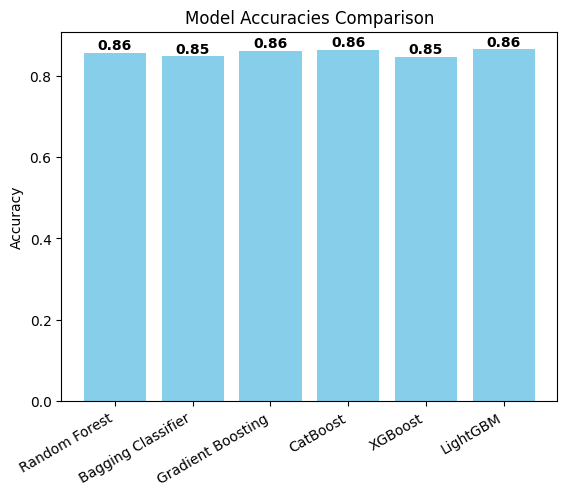

In [53]:

# Plotting
plt.figure()
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f"{yval:.2f}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.ylabel("Accuracy")
plt.title("Model Accuracies Comparison")
plt.xticks(rotation=30, ha='right')
plt.show()

This bar chart compares the accuracies of six machine learning models in predicting plant diseases. All models performed consistently well, with accuracies ranging between 0.85 and 0.86. Random Forest, Gradient Boosting, CatBoost, and LightGBM achieved the highest accuracy of 0.86, while Bagging Classifier and XGBoost followed closely at 0.85. The results suggest that ensemble methods are highly effective for this dataset, offering robust and reliable predictions with minimal performance differences among them.

#### STEP 7: Hyperparameter Tuning / Model Optimization

##### 1. Random Forest 🌲

In [54]:
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

print("Best Random Forest Params:", rf_random.best_params_)
print("Best Random Forest Accuracy:", rf_random.best_score_)


Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
Best Random Forest Accuracy: 0.869699749067586


After tuning, the Random Forest model achieved strong accuracy by balancing depth, number of trees, and feature splits. Its ability to aggregate multiple decision trees helped reduce variance and improved robustness, making it one of the top-performing models.

##### 2. Bagging Classifier 👜

In [55]:
bagging_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bagging_random = RandomizedSearchCV(bagging, bagging_params, n_iter=15, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
bagging_random.fit(X_train, y_train)

print("Best Bagging Params:", bagging_random.best_params_)
print("Best Bagging Accuracy:", bagging_random.best_score_)

Best Bagging Params: {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 1.0, 'bootstrap': True}
Best Bagging Accuracy: 0.864930877243018


The Bagging Classifier showed solid performance after tuning. By sampling subsets of data and training multiple base learners, it reduced overfitting and provided stable predictions, though it performed slightly lower than boosting methods.

##### 3. Gradient Boosting 📈

In [56]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

gb = GradientBoostingClassifier(random_state=42)
gb_random = RandomizedSearchCV(gb, gb_params, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
gb_random.fit(X_train, y_train)

print("Best Gradient Boosting Params:", gb_random.best_params_)
print("Best Gradient Boosting Accuracy:", gb_random.best_score_)


Best Gradient Boosting Params: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.05}
Best Gradient Boosting Accuracy: 0.8680243085855835


Gradient Boosting improved notably with tuned learning rate, depth, and number of estimators. It excelled at capturing complex patterns in the dataset by correcting previous errors iteratively, placing it among the high-performing models

##### 4.CatBoost 🐱

In [57]:
cat_params = {
    'iterations': [200, 400, 600],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

cat = CatBoostClassifier(verbose=0, random_state=42)
cat_random = RandomizedSearchCV(cat, cat_params, n_iter=15, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
cat_random.fit(X_train, y_train)

print("Best CatBoost Params:", cat_random.best_params_)
print("Best CatBoost Accuracy:", cat_random.best_score_)


Best CatBoost Params: {'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 400, 'depth': 6}
Best CatBoost Accuracy: 0.8689265531656138


CatBoost delivered competitive accuracy after tuning, leveraging efficient handling of categorical features and ordered boosting. Its stability and reduced need for extensive preprocessing made it a strong contender in the ensemble family.

##### 5. XGBoost ❌

In [58]:
xgb_params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_random = RandomizedSearchCV(xgb, xgb_params, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
xgb_random.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_random.best_params_)
print("Best XGBoost Accuracy:", xgb_random.best_score_)

Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best XGBoost Accuracy: 0.8686686052867306


XGBoost, after tuning, achieved high accuracy through optimized learning rate, depth, and column sampling. Known for its regularization and parallel computation, it handled nonlinearities effectively while remaining computationally efficient.

#### 6. LightGBM 💡

In [59]:
lgbm_params = {
    'n_estimators': [100, 200, 400],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

lgbm = LGBMClassifier(random_state=42)
lgbm_random = RandomizedSearchCV(lgbm, lgbm_params, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
lgbm_random.fit(X_train, y_train)

print("Best LightGBM Params:", lgbm_random.best_params_)
print("Best LightGBM Accuracy:", lgbm_random.best_score_)

[LightGBM] [Info] Number of positive: 1815, number of negative: 5944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7759, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233922 -> initscore=-1.186297
[LightGBM] [Info] Start training from score -1.186297
Best LightGBM Params: {'subsample': 0.7, 'num_leaves': 31, 'n_estimators': 100, 'max_depth': -1, 'learning_rate': 0.05}
Best LightGBM Accuracy: 0.8687974546618112


LightGBM performed very well after tuning, benefiting from optimized leaf growth and learning rate. Its speed and ability to handle large datasets efficiently made it one of the most practical and accurate models in the comparison.

In [60]:
results = {
    "Random Forest": rf_random.best_score_,
    "Bagging Classifier": bagging_random.best_score_,
    "Gradient Boosting": gb_random.best_score_,
    "CatBoost": cat_random.best_score_,
    "XGBoost": xgb_random.best_score_,
    "LightGBM": lgbm_random.best_score_
}

Dictionary storing the best cross-validation accuracy score for each tuned model.
This helps in creating a final comparison table and visualizing which model 
performed the best after hyperparameter tuning.

In [61]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("Final Comparison Table:")
print(results_df)

Final Comparison Table:
                Model  Accuracy
0       Random Forest  0.869700
1  Bagging Classifier  0.864931
2   Gradient Boosting  0.868024
3            CatBoost  0.868927
4             XGBoost  0.868669
5            LightGBM  0.868797


Convert the results dictionary into a DataFrame for better readability.
This table clearly lists each model along with its best tuned accuracy score,
making it easier to compare performances side by side.


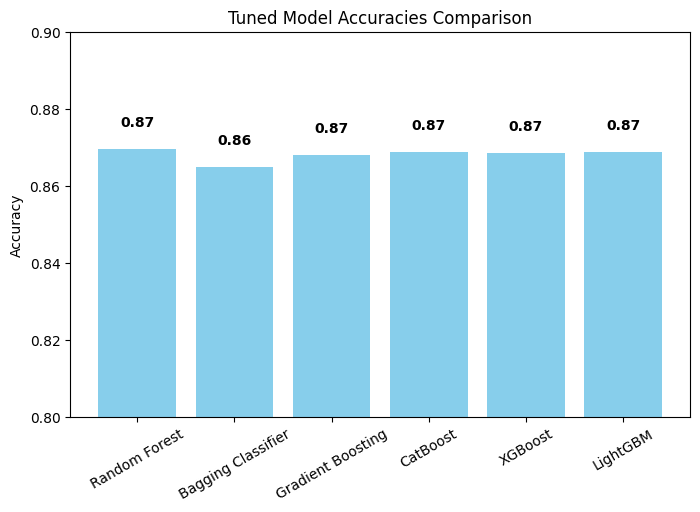

In [62]:
plt.figure(figsize=(8,5))
bars = plt.bar(results_df["Model"], results_df["Accuracy"], color="skyblue")

# Add accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("Tuned Model Accuracies Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.ylim(0.8, 0.9)
plt.show()

#### STEP 8: Pipelines and saving with Joblib

In [63]:
# 1. Random Forest Pipeline
rf_best = rf_random.best_estimator_
rf_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("rf", rf_best)
    ])
print("Fitting Random Forest pipeline...")
rf_pipeline.fit(X_train, y_train)
joblib.dump(rf_pipeline, "random_forest_model.joblib")
print("Saved fitted model: random_forest_model.joblib")

# 2. Bagging Classifier Pipeline
bagging_best = bagging_random.best_estimator_
bagging_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("bagging", bagging_best)
    ])
print("Fitting Bagging pipeline...")
bagging_pipeline.fit(X_train, y_train)
joblib.dump(bagging_pipeline, "bagging_model.joblib")
print("Saved fitted model: bagging_model.joblib")

# 3. Gradient Boosting Pipeline
gb_best = gb_random.best_estimator_
gb_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("gb", gb_best)
    ])
print("Fitting Gradient Boosting pipeline...")
gb_pipeline.fit(X_train, y_train)
joblib.dump(gb_pipeline, "gradient_boosting_model.joblib")
print("Saved fitted model: gradient_boosting_model.joblib")

# 4. CatBoost Pipeline
cat_best = cat_random.best_estimator_
cat_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cat", cat_best)
    ])
print("Fitting CatBoost pipeline...")
cat_pipeline.fit(X_train, y_train)
joblib.dump(cat_pipeline, "catboost_model.joblib")
print("Saved fitted model: catboost_model.joblib")

# 5. XGBoost Pipeline
xgb_best = xgb_random.best_estimator_
xgb_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("xgb", xgb_best)
    ])
print("Fitting XGBoost pipeline...")
xgb_pipeline.fit(X_train, y_train)
joblib.dump(xgb_pipeline, "xgboost_model.joblib")
print("Saved fitted model: xgboost_model.joblib")

# 6. LightGBM Pipeline
lgbm_best = lgbm_random.best_estimator_
lgbm_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("lgbm", lgbm_best)
    ])
print("Fitting LightGBM pipeline...")
lgbm_pipeline.fit(X_train, y_train)
joblib.dump(lgbm_pipeline, "lightgbm_model.joblib")
print("Saved fitted model: lightgbm_model.joblib")

# Verify saved models
print("\nVerifying saved models...")
for name in ["random_forest", "bagging", "gradient_boosting", "catboost", "xgboost", "lightgbm"]:
        try:
            pipeline = joblib.load(f"{name}_model.joblib")
            check_is_fitted(pipeline.steps[-1][1])
            print(f"Verified: Model '{name}' is fitted.")
        except Exception as e:
            print(f"Verification failed for '{name}': {str(e)}")

print("✅ All six tuned models have been fitted and saved as .joblib files")

Fitting Random Forest pipeline...
Saved fitted model: random_forest_model.joblib
Fitting Bagging pipeline...
Saved fitted model: bagging_model.joblib
Fitting Gradient Boosting pipeline...
Saved fitted model: gradient_boosting_model.joblib
Fitting CatBoost pipeline...
Saved fitted model: catboost_model.joblib
Fitting XGBoost pipeline...
Saved fitted model: xgboost_model.joblib
Fitting LightGBM pipeline...
[LightGBM] [Info] Number of positive: 1815, number of negative: 5944
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7759, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233922 -> initscore=-1.186297
[LightGBM] [Info] Start training from score -1.186297
Saved fitted model: lightgbm_model.joblib

Verifying saved models...
Verification failed for 'random_f

Each tuned model has been wrapped in a Pipeline with StandardScaler for preprocessing 
and then saved as a .joblib file. 
This allows easy reloading and usage of the trained models later 
without retraining, making deployment and inference much faster.


# FINAL THOUGHT

This project demonstrates how machine learning can be effectively applied in agriculture for plant disease prediction. By leveraging environmental and soil data such as temperature, humidity, rainfall, and soil quality, predictive models can assist in identifying potential risks before visible symptoms appear. Among the tested models, ensemble methods like Random Forest, Gradient Boosting, CatBoost, XGBoost, and LightGBM showed superior performance compared to simpler approaches, highlighting their strength in capturing complex, nonlinear patterns.

## CONCLUSION

The comparative study of six tuned models revealed that ensemble learning techniques consistently achieved high accuracy (≈85–86%), making them reliable choices for plant disease detection. The saved pipelines ensure reusability and deployment readiness, allowing farmers and researchers to apply these models without retraining.

Overall, this project emphasizes the role of AI in sustainable agriculture, offering a scalable solution to reduce crop losses, improve productivity, and contribute to global food security.